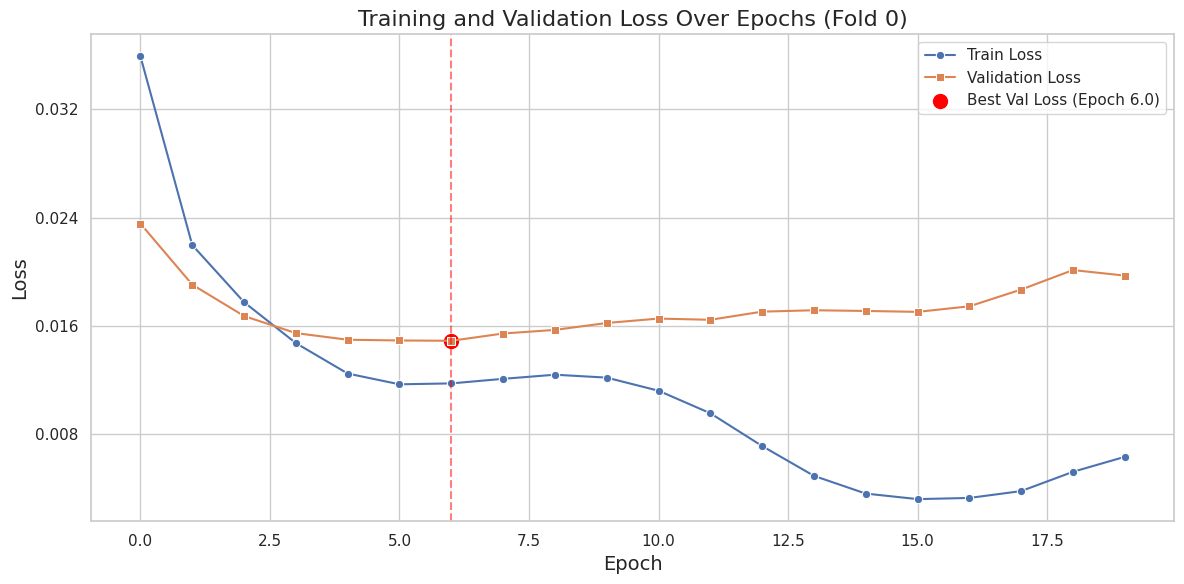

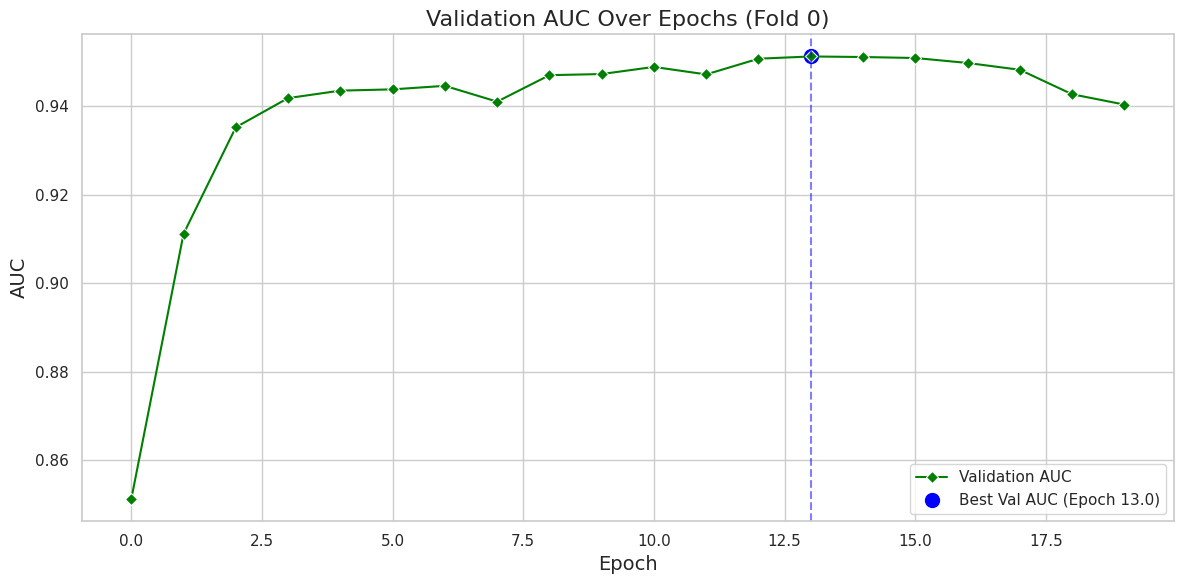

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the data
file_path = '/home/cele/다운로드/val_loss_log.npy'
data = np.load(file_path)

# Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # skip header row

# Convert numeric columns from string to float
df = df.astype({
    'fold': float,
    'epoch': float,
    'train_loss': float,
    'train_auc': float,
    'val_loss': float,
    'val_auc': float
})

# Set style
sns.set(style="whitegrid")

# Find best epoch for val_loss
best_loss_epoch = df.loc[df['val_loss'].idxmin(), 'epoch']
best_val_loss = df['val_loss'].min()

# Find best epoch for val_auc
best_auc_epoch = df.loc[df['val_auc'].idxmax(), 'epoch']
best_val_auc = df['val_auc'].max()

# Plot train_loss and val_loss
plt.figure(figsize=(12, 6))
sns.lineplot(x='epoch', y='train_loss', data=df, label='Train Loss', marker='o')
sns.lineplot(x='epoch', y='val_loss', data=df, label='Validation Loss', marker='s')

# Highlight best loss epoch
plt.scatter(best_loss_epoch, best_val_loss, color='red', s=100, label=f'Best Val Loss (Epoch {best_loss_epoch:.1f})')
plt.axvline(x=best_loss_epoch, linestyle='--', color='red', alpha=0.5)

plt.title('Training and Validation Loss Over Epochs (Fold 0)', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set at least 5 y-ticks in linear scale
plt.legend()
plt.tight_layout()
plt.show()

# Plot val_auc
plt.figure(figsize=(12, 6))
sns.lineplot(x='epoch', y='val_auc', data=df, label='Validation AUC', marker='D', color='green')

# Highlight best auc epoch
plt.scatter(best_auc_epoch, best_val_auc, color='blue', s=100, label=f'Best Val AUC (Epoch {best_auc_epoch:.1f})')
plt.axvline(x=best_auc_epoch, linestyle='--', color='blue', alpha=0.5)

plt.title('Validation AUC Over Epochs (Fold 0)', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
